In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use( 'seaborn-v0_8-whitegrid')

# Gaussian Naive Bayes

Assumption - the data from each label is drawn from a simple Gaussian Distribution

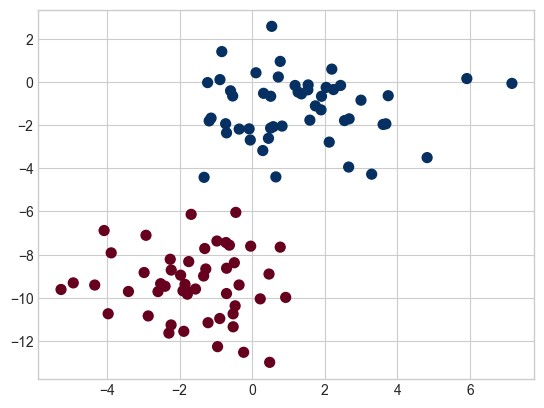

In [7]:
from sklearn.datasets import make_blobs

X, y =make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')

In [8]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y)

GaussianNB()

In [9]:
#generate new data point
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
Xnew

array([[ 1.68338905, -1.12659141],
       [ 2.43868727, -4.19210271],
       [-0.06883281, -2.37390596],
       ...,
       [-4.32134532, -7.70649139],
       [ 0.08823081,  0.94005305],
       [ 7.05928655, -8.44990818]], shape=(2000, 2))

In [11]:
ynew = model.predict(Xnew)
ynew

array([1, 1, 1, ..., 0, 1, 1], shape=(2000,))

(np.float64(-5.890554373486014),
 np.float64(7.777566725032841),
 np.float64(-13.775943665162341),
 np.float64(3.3634536696825847))

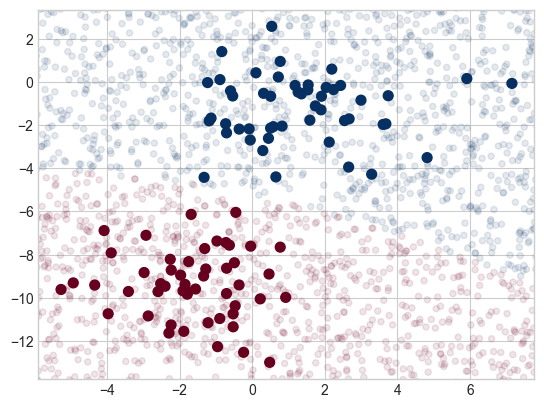

In [22]:
#plot the new data 
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim)

In [24]:
model.predict_proba(Xnew)[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

# Multinomial Naive Bayes

describe the probability of observing counts among a number of categories. 

used in text classification where features are related to word count

best example is to filter spam/not spam

In [25]:
from sklearn.datasets import fetch_20newsgroups

data =fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [27]:
#lets select few categories and download trainig and testing
categories = ['rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics']

train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)


In [32]:
print(train.data[5][48:])

nard)
Subject: Re: Wings take game one
Keywords: The Detroit Red Wings - 6 ; The Toronto Maple Leafs - 3
Organization: Dept. of Computer Science, Laurentian University, Sudbury, ON
Lines: 19

In <1qvos8$r78@msuinfo.cl.msu.edu> vergolin@euler.lbs.msu.edu (David Vergolini) writes:

>  The Detroit Red Wings put a lot of doubter on ice tonight with a 6 - 3
>washing of the Toronto Maple Leafs.  All you Toronto fans have now seen the
>power of the mighty Red Wing offense.  Toronto's defense in no match for the
>Wing offense.  As for the defense, Probert, Kennedey and Primeau came out

Did they move Probert back to defense?  Why did I see him parking his ass
in front of Potvin all night?  Somebody is going to have to discipline
Probert if the Leafs want to win the series.  Perhaps a fresh Clark should
hit the ice at the end of a long Probert shift and straigten him out for
a while...


-- 

cordially, as always,                      maynard@ramsey.cs.laurentian.ca 
                           

to use the data in ML, we need to convert the data contetn into vector of numbers. 
Use TF-IDF vectorizer & Create pipeline

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [34]:
model.fit(train.data, train.target)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [36]:
labels = model.predict(test.data)

Text(118.78333333333332, 0.5, 'predicted label')

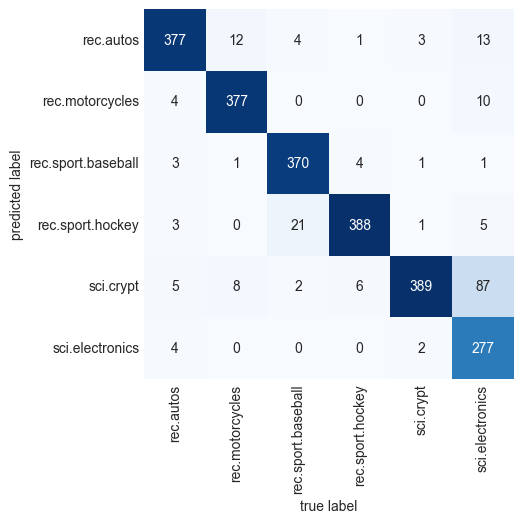

In [38]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names, cmap='Blues')
plt.xlabel('true label')
plt.ylabel('predicted label')


In [39]:
#function to predict
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [40]:
predict_category('lets play baseball')

'rec.sport.hockey'

In [41]:
predict_category('probabr back to the defence')

'rec.sport.hockey'